In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data shape: (70000, 784), Labels shape: (70000,)


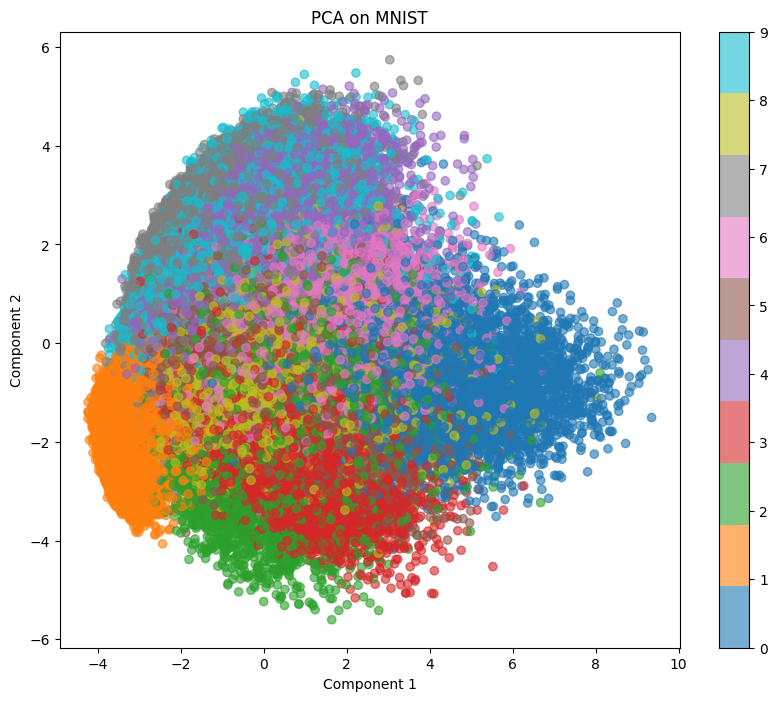

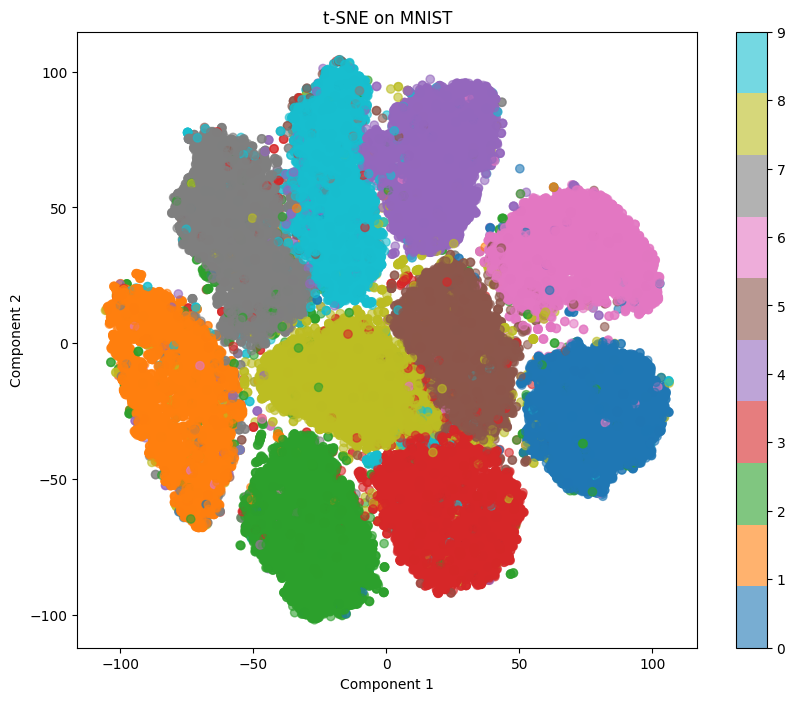

C:\Users\ayush\anaconda3\envs\Ayush\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


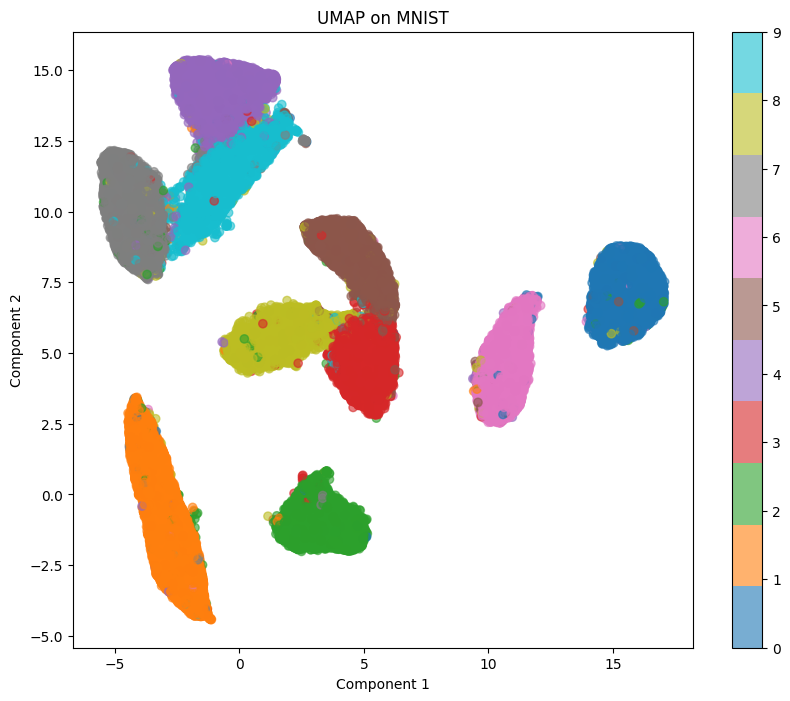

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Display the shape of the data
print(f"Data shape: {X.shape}, Labels shape: {y.shape}")

# Normalize the data
X_normalized = X / 255.0

# Function to plot 2D projections
def plot_2d_projection(data_2d, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
plot_2d_projection(X_pca, y, "PCA on MNIST")

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)
plot_2d_projection(X_tsne, y, "t-SNE on MNIST")

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_normalized)
plot_2d_projection(X_umap, y, "UMAP on MNIST")


In [3]:
# Import required libraries(Reduced Dimension 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Function to train and evaluate a classifier
def train_and_evaluate(X_reduced, y, method_name):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
    
    # Train a logistic regression classifier
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(f"Performance for {method_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Train and evaluate on PCA-reduced data
train_and_evaluate(X_pca, y, "PCA")

# Train and evaluate on t-SNE-reduced data
train_and_evaluate(X_tsne, y, "t-SNE")

# Train and evaluate on UMAP-reduced data
train_and_evaluate(X_umap, y, "UMAP")


Performance for PCA:
Accuracy: 0.4486428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69      1343
           1       0.83      0.95      0.89      1600
           2       0.24      0.13      0.17      1380
           3       0.45      0.61      0.52      1433
           4       0.36      0.43      0.39      1295
           5       0.16      0.00      0.01      1273
           6       0.32      0.42      0.37      1396
           7       0.41      0.65      0.51      1503
           8       0.26      0.30      0.28      1357
           9       0.25      0.06      0.10      1420

    accuracy                           0.45     14000
   macro avg       0.39      0.44      0.39     14000
weighted avg       0.40      0.45      0.40     14000



Performance for t-SNE:
Accuracy: 0.9566428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99 

In [4]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalize labels to one-hot encoding
y_categorical = to_categorical(y, 10)

# Function to train and evaluate a CNN model
def train_and_evaluate_cnn(X_reduced, y, method_name):
    # Normalize the reduced data (scaled between 0 and 1 for consistency)
    scaler = MinMaxScaler()
    X_reduced = scaler.fit_transform(X_reduced)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
    
    # Define a simple feedforward CNN for reduced-dimensional data
    model = Sequential([
        Flatten(input_shape=(X_train.shape[1],)),  # Flatten input features
        Dense(128, activation='relu'),
        Dropout(0.5),  # Dropout to reduce overfitting
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"Test Accuracy for {method_name}: {test_accuracy * 100:.2f}%")
    
    return history, test_accuracy

# Train and evaluate CNN on PCA-reduced data
history_pca, accuracy_pca = train_and_evaluate_cnn(X_pca, y_categorical, "PCA")

# Train and evaluate CNN on t-SNE-reduced data
history_tsne, accuracy_tsne = train_and_evaluate_cnn(X_tsne, y_categorical, "t-SNE")

# Train and evaluate CNN on UMAP-reduced data
history_umap, accuracy_umap = train_and_evaluate_cnn(X_umap, y_categorical, "UMAP")


Epoch 1/10
350/350 [==============================] - 1s 2ms/step - loss: 1.8853 - accuracy: 0.2896 - val_loss: 1.4999 - val_accuracy: 0.4337
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 1.5531 - accuracy: 0.3898 - val_loss: 1.4148 - val_accuracy: 0.4393
Epoch 3/10
350/350 [==============================] - 1s 1ms/step - loss: 1.4943 - accuracy: 0.4066 - val_loss: 1.3822 - val_accuracy: 0.4459
Epoch 4/10
350/350 [==============================] - 1s 1ms/step - loss: 1.4692 - accuracy: 0.4178 - val_loss: 1.3715 - val_accuracy: 0.4496
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 1.4531 - accuracy: 0.4207 - val_loss: 1.3646 - val_accuracy: 0.4515
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 1.4387 - accuracy: 0.4266 - val_loss: 1.3582 - val_accuracy: 0.4521
Epoch 7/10
350/350 [==============================] - 1s 2ms/step - loss: 1.4354 - accuracy: 0.4287 - val_loss: 1.3527 - val_accuracy: 0.4542
Epoch 

In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values to 0-1 range)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to add a channel dimension (needed for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the CNN
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model for future use (optional)
model.save('mnist_cnn_model.h5')


11490434/11490434 [==============================] - 11s 1us/step
Epoch 1/10
375/375 [==============================] - 13s 33ms/step - loss: 0.3443 - accuracy: 0.8941 - val_loss: 0.0745 - val_accuracy: 0.9793
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 0.1076 - accuracy: 0.9678 - val_loss: 0.0608 - val_accuracy: 0.9818
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0787 - accuracy: 0.9763 - val_loss: 0.0488 - val_accuracy: 0.9853
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.0415 - val_accuracy: 0.9876
Epoch 5/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.0381 - val_accuracy: 0.9890
Epoch 6/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0353 - val_accuracy: 0.9894
Epoch 7/10
375/375 [==============================] - 12s 32ms/step - 